# Case Study: Churn prediction project

**Data Science Use Case in Marketing**: Customer Churn Rate Prediction
Customer churn is a tendency of customers to cancel their subscriptions to a service they have been using and, hence, stop being a client of that service. Customer churn rate is the percentage of churned customers within a predefined time interval. It's the opposite of the customer growth rate that tracks new clients.

Customer churn rate is a very important indicator of customer satisfaction and the overall business wellness of the company. Apart from natural churn which always takes place in any business, or seasonable churn typical of some services, there are other factors that can mean something in the company has gone wrong and should be fixed. These factors are:

* lack or low quality of customer support<br>,
*  negative customer experiences<br>,
* switching to a competitor with better conditions or pricing strategy<br>,
* customers’ priorities changed<br>,
* long-time customers don’t feel satisfied<br>,
* the service didn't meet customers’ expectations<br>,
* finance issues<br>,
* fraud protection on customers' payments<br>.

High customer churn rate represents a serious problem for any company for the following reasons:

* It correlates with the company's revenue loss<br>.
* It takes much more money to acquire new customers than to retain the existing ones. This is especially true for highly ** competitive markets<br>.
* In the case of churning because of poor customer service, the company's reputation may be heavily damaged because of negative reviews left by unsatisfied ex-customers on social media or review websites<br>.
Customer retention is a crucial component of the business strategy for all subscription-based services. To predict customer churn rate and undertake the corresponding preventive measures, it's necessary to gather and analyze the information on customer behavior (purchase intervals, the overall period of being a client, cancellations, follow-up calls and messages, online activity) and figure out which attributes and their combinations are characteristic to the clients that are at risk of leaving. Knowing in advance which customers may churn soon, especially in the case of high revenue or long-time customers, can help the company to focus exactly on them and develop an efficient strategy to try to convince them to stay. The approach can include a call to such clients with a special offer of a gift, discount, subscription upgrading for the same price, or any other customized experience.

Technically, customer churn prediction is a typical classification problem of machine learning when the clients are labeled as "yes" or "no", in terms of being at risk of churning, or not. Let's investigate this use case in Python on real-world data.

We'll use Decision Tree to predict churn


## 1.1 

* Dataset: https://drive.google.com/file/d/15C1130YVEymfJltHUFX9nZr-OGns82gJ/view?usp=drive_link



### Dataset  information

customerID
Customer ID

gender
Whether the customer is a male or a female

SeniorCitizen
Whether the customer is a senior citizen or not (1, 0)

Partner
Whether the customer has a partner or not (Yes, No)

Dependents
Whether the customer has dependents or not (Yes, No)

tenure
Number of months the customer has stayed with the company

PhoneService
Whether the customer has a phone service or not (Yes, No)

MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

## 1.2 Data Science Workflow

#### Data preprocessing
**Download the data, read it with pandas<br>**
**Look at the data<br>**
**Make column names and values look uniform<br>**
**Check if all the columns read correctly<br>**
**Check if the churn variable needs any preparation<br>**

#### EDA

**check for missing values/ treat them with right imputation techniques<br>**
**Look at the target variable (churn)<br>**
**Look at numerical and categorical variables<br>**
**Visualize the data -- understand the relationship/impacts<br>**
**Feature selection -- requires domain understanding along with techincal knowledge<br>**
**Feature Engineering --> encoding the data/creating the new features<br>**
**conduct a hypothesis testing if required**<br>

#### Build The model
**Setting up the framework<br>**
**Model building<br>**
**Feature selection<br>**
**Model evaluation<br>**
**model optimization<br>**
**Model interepretation<br>**
**Choosing the right model<br>**


#### Deployment 
**Understand Mlops -- Machine learning operation-optional**


#### Data preprocessing
* Download the data, read it with pandas<br>
* Look at the data<br>
* Make column names and values look uniform<br>
* Check if all the columns read correctly<br>
* Check if the churn variable needs any preparation<br>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check all columns
df.columns
len(df.columns)

21

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
#prepare data



df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
#recheck the dataframe
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [9]:
#convert churn variable to int

df.churn = (df.churn == 'yes').astype(int)

In [10]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

#### EDA

* check for missing values/ treat them with right imputation techniques<br>
* Look at the target variable (churn)<br>
* Look at numerical and categorical variables<br>
* Visualize the data -- understand the relationship/impacts<br>
* Feature selection -- requires domain understanding along with techincal knowledge<br>
* Feature Engineering --> encoding the data/creating the new features<br>
* conduct a hypothesis testing if required<br>

In [11]:
#check for missing data
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
#check if class if balanced or not


df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [13]:
#check for the mean churn value
df.churn.mean()

0.2653698707936959

In [14]:
#check for numerical columns
df.select_dtypes(include='number')



,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


In [15]:
#check for categorical columns
df.select_dtypes(include='object')



,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges
0,7590-vhveg,female,yes,no,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85
1,5575-gnvde,male,no,no,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,1889.5
2,3668-qpybk,male,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,108.15
3,7795-cfocw,male,no,no,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),1840.75
4,9237-hqitu,female,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,1990.5
7039,2234-xaduh,female,yes,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),7362.9
7040,4801-jzazl,female,yes,yes,no,no_phone_service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic_check,346.45
7041,8361-ltmkd,male,yes,no,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,mailed_check,306.6


In [16]:
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [17]:
#recheck dtypes in the df
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [18]:
# !pip install autoviz==0.0.2

In [19]:
# import autoviz

In [20]:
#check for unique values in each categorical columns
# print(autoviz.__version__)

In [21]:
# from autoviz.AutoViz_Class import AutoViz_Class

# #instantiate autoviz class
# AV=AutoViz_Class()
# report = AV.AutoViz(filename="", dfte=df, verbose=2, depVar="", header=0, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [22]:
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [23]:
df.totalcharges=df.totalcharges.replace(to_replace=np.NaN, value=df.totalcharges.mean())

In [24]:
#recheck after imputing missing values
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

<Axes: xlabel='churn', ylabel='count'>

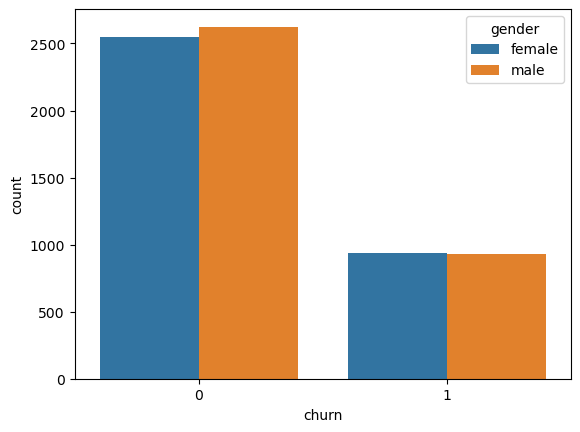

In [25]:
#sns countplot
sns.countplot(data=df, x='churn', hue='gender',)

<Axes: xlabel='tenure', ylabel='totalcharges'>

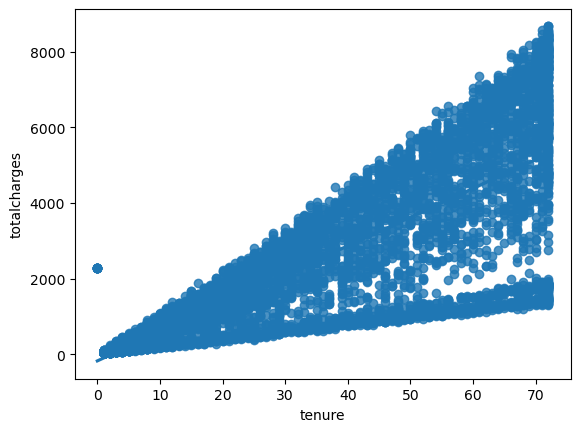

In [26]:
sns.regplot(data=df, x="tenure", y="totalcharges")

<Axes: xlabel='monthlycharges', ylabel='totalcharges'>

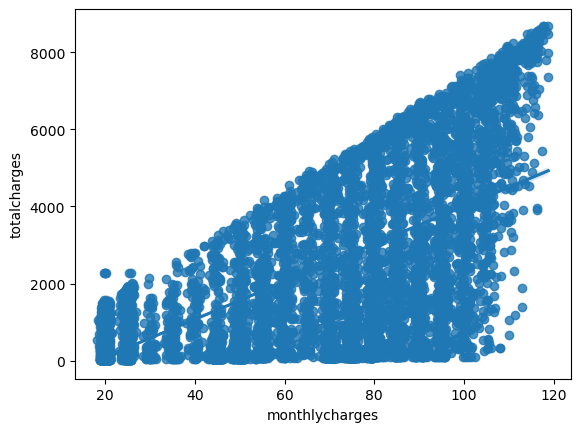

In [27]:
sns.regplot(data=df, x="monthlycharges", y="totalcharges")

C:\Users\91630\AppData\Local\Temp\ipykernel_4124\226183057.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

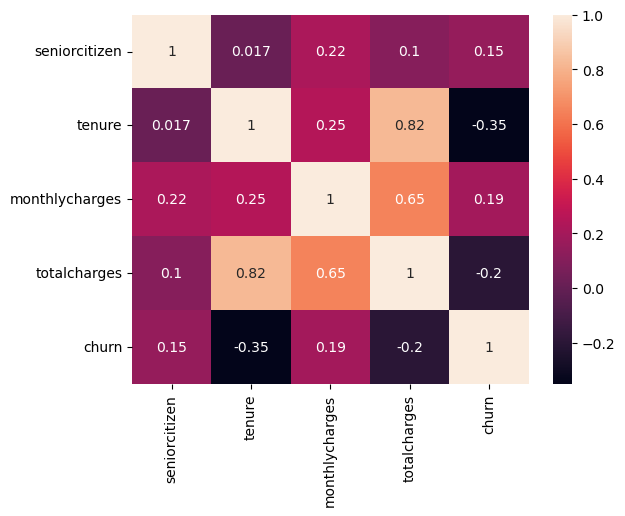

In [28]:
#distribution
#which variable has normal distribution
#standardization
#multivariate analysis
sns.heatmap(df.corr(), annot=True)

In [29]:

#featureselection using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

In [30]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [31]:
x=df[['seniorcitizen','tenure','monthlycharges', 'totalcharges']]

In [32]:
y=df[['churn']]

In [33]:
test=SelectKBest(score_func=chi2,k=3)
fit=test.fit(x,y)

In [34]:
np.set_printoptions(precision=3)
print(fit.scores_)

[1.344e+02 1.628e+04 3.681e+03 6.293e+05]


In [35]:
#featureselection using recursive feature elimination (wrapper technique)
#we will apply this after the model has been built

<Axes: >

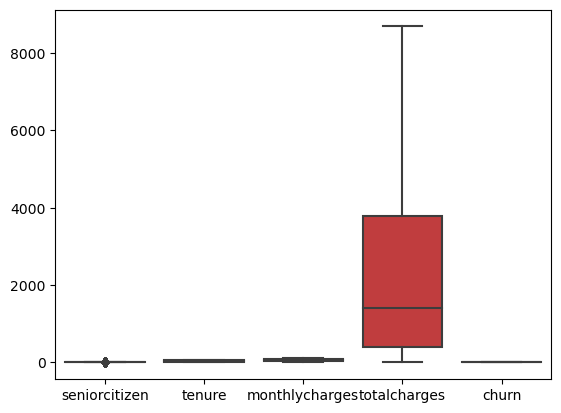

In [36]:
#feature engineering
#outlier treatment
#IQR
sns.boxplot(df)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
enc=LabelEncoder()

In [39]:
df.gender=enc.fit_transform(df.gender)

In [40]:
df.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [41]:
df.partner.value_counts()

no     3641
yes    3402
Name: partner, dtype: int64

In [42]:
#since only two values that is why label encoder
df.partner=enc.fit_transform(df.partner)

In [43]:
df.partner.value_counts()

0    3641
1    3402
Name: partner, dtype: int64

In [44]:
df.dependents=enc.fit_transform(df.dependents)

In [45]:
df.dependents.value_counts()

0    4933
1    2110
Name: dependents, dtype: int64

In [46]:
df.phoneservice=enc.fit_transform(df.phoneservice)

In [47]:
df.phoneservice.value_counts()

1    6361
0     682
Name: phoneservice, dtype: int64

In [48]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,0,0,1,0,1,0,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,1,0,0,0,34,1,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,1,0,0,0,2,1,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,1,0,0,0,45,0,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,0,0,0,0,2,1,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [49]:
cat_col= df.select_dtypes(include='object').columns

In [50]:
for col in cat_col:
    df[col]=enc.fit_transform(df[col])

In [51]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [52]:
df.drop('customerid', axis=1, inplace=True)

In [53]:
#hypothesis testing
!pip install scipy

In [54]:
from scipy.stats import ttest_ind

churned_customers=df[df['churn']==1]['monthlycharges']
non_churned_customers=df[df['churn']==0]['monthlycharges']

#Perform t-test for independent samples
t_statistic, p_value=ttest_ind(churned_customers, non_churned_customers)

#define significance level
alpha=0.05

#print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

#check fro statistical significance

if p_value<alpha:
    print("\nReject the null hypothesis: There is evidence of a difference in mean monthly charges between churned and non-churned customers")

else:
    print("\nFail to reject the null hypothesis: There is no evidence of a difference in mean monthly charges between churned and non-churned customers")

T-Statistic: 16.536738015936308
P-Value: 2.7066456068884154e-60

Reject the null hypothesis: There is evidence of a difference in mean monthly charges between churned and non-churned customers


In [55]:
#setting up the framework
X=df.iloc[:,:-1]
X

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [56]:
Y=df.iloc[:,-1]
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.20, random_state=100)

In [59]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [60]:
#import model decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
d_model=DecisionTreeClassifier()

In [62]:
d_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [63]:
prediction_tree=d_model.predict(X_test)

In [64]:
prediction_tree

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score

In [66]:
print(classification_report(Y_test, prediction_tree))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1025
           1       0.52      0.50      0.51       384

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.67      1409
weighted avg       0.73      0.74      0.74      1409



In [67]:
precision_score(Y_test, prediction_tree)

0.5188172043010753

In [68]:
recall_score(Y_test, prediction_tree)

0.5026041666666666

In [69]:
#model tuning
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [70]:
grid_search=GridSearchCV(estimator=d_model, param_grid=params, cv=4, n_jobs=1, verbose=1, scoring="accuracy")

In [71]:
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [72]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [73]:
!pip install imblearn

In [74]:
#using smote to improve model performance
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91630\anaconda3\Lib\site-packages\pip\_vend

In [75]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [76]:
!pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


In [77]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
sm=SMOTE(random_state=42)

In [ ]:
X_train_over, Y_train_over=sm.fit_resample(X_train, Y_train)